In [ ]:
# Muhammad Ans
# L1F19BSSE0147

In [ ]:
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
#loading dataset

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0 #normalization 0-1

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 104s 55ms/step - loss: 0.4336 - accuracy: 0.8432
Epoch 2/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.2920 - accuracy: 0.8921
Epoch 3/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.2446 - accuracy: 0.9082
Epoch 4/5
1875/1875 [==============================] - 100s 53ms/step - loss: 0.2135 - accuracy: 0.9203
Epoch 5/5
313/313 [==============================] - 6s 17ms/step - loss: 0.2575 - accuracy: 0.9061


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 5s 17ms/step


In [ ]:
predictions[0]

array([0.08533801, 0.08533803, 0.085338  , 0.08533805, 0.085338  ,
       0.08533949, 0.085338  , 0.08534488, 0.08533816, 0.2319494 ],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
img = test_images[900]
print(img.shape)

(28, 28, 1)


In [ ]:
predictions[5000]

array([0.08538728, 0.08537041, 0.23143604, 0.08537045, 0.08545445,
       0.08537041, 0.08549968, 0.08537041, 0.08537045, 0.08537041],
      dtype=float32)

In [ ]:
np.argmax(predictions[5000])

2

In [ ]:
test_labels[5000]

2

In [ ]:
import matplotlib.pyplot as plt
img = test_images[5000].reshape(28,28)

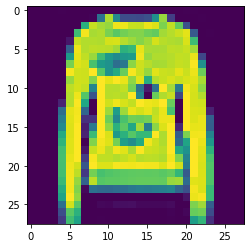

In [ ]:
plt.imshow(img)